### Word embedding model is built from scratch and plotted the generated embedding in 3D plot. 

In [1]:
text = '''Machine learning is the study of computer algorithms that \
improve automatically through experience. It is seen as a \
subset of artificial intelligence. Machine learning algorithms \
build a mathematical model based on sample data, known as \
training data, in order to make predictions or decisions without \
being explicitly programmed to do so. Machine learning algorithms \
are used in a wide variety of applications, such as email filtering \
and computer vision, where it is difficult or infeasible to develop \
conventional algorithms to perform the needed tasks.'''

import re

def tokenize(text):
    pattern = re.compile(r'[A-Za-z]+[\w^\']*|[\w^\']*[A-Za-z]+[\w^\']*')
    return pattern.findall(text.lower())

tokens = tokenize(text)
print(tokens)

def mapping(tokens):
    word_to_id = {}
    id_to_word = {}
    
    for i, token in enumerate(set(tokens)):
        word_to_id[token] = i
        id_to_word[i] = token
    
    return word_to_id, id_to_word

word_to_id, id_to_word = mapping(tokens)

import numpy as np

np.random.seed(42)

def one_hot_encode(id, vocab_size):
    res = [0] * vocab_size
    res[id] = 1
    return res

def generate_training_data(tokens, word_to_id, window):
    X = []
    y = []
    n_tokens = len(tokens)
    
    for i in range(n_tokens):
        idx = concat(
            range(max(0, i - window), i), 
            range(i, min(n_tokens, i + window + 1))
        )
        for j in idx:
            if i == j:
                continue
            X.append(one_hot_encode(word_to_id[tokens[i]], len(word_to_id)))
            y.append(one_hot_encode(word_to_id[tokens[j]], len(word_to_id)))
    
    return np.asarray(X), np.asarray(y)


def concat(*iterables):
    for iterable in iterables:
        yield from iterable

X, y = generate_training_data(tokens, word_to_id, 2)

print(X.shape)



['machine', 'learning', 'is', 'the', 'study', 'of', 'computer', 'algorithms', 'that', 'improve', 'automatically', 'through', 'experience', 'it', 'is', 'seen', 'as', 'a', 'subset', 'of', 'artificial', 'intelligence', 'machine', 'learning', 'algorithms', 'build', 'a', 'mathematical', 'model', 'based', 'on', 'sample', 'data', 'known', 'as', 'training', 'data', 'in', 'order', 'to', 'make', 'predictions', 'or', 'decisions', 'without', 'being', 'explicitly', 'programmed', 'to', 'do', 'so', 'machine', 'learning', 'algorithms', 'are', 'used', 'in', 'a', 'wide', 'variety', 'of', 'applications', 'such', 'as', 'email', 'filtering', 'and', 'computer', 'vision', 'where', 'it', 'is', 'difficult', 'or', 'infeasible', 'to', 'develop', 'conventional', 'algorithms', 'to', 'perform', 'the', 'needed', 'tasks']
(330, 60)


In [2]:
def init_network(vocab_size, n_embedding):
    model = {
        "w1": np.random.randn(vocab_size, n_embedding),
        "w2": np.random.randn(n_embedding, vocab_size)
    }
    return model

In [3]:
model = init_network(len(word_to_id), 3)

In [4]:
def forward(model, X, return_cache=True):
    cache = {}
    
    cache["a1"] = X @ model["w1"]
    cache["a2"] = cache["a1"] @ model["w2"]
    cache["z"] = softmax(cache["a2"])
    
    if not return_cache:
        return cache["z"]
    return cache

In [5]:
def softmax(X):
    res = []
    for x in X:
        exp = np.exp(x)
        res.append(exp / exp.sum())
    return res

In [6]:
def backward(model, X, y, alpha):
    cache  = forward(model, X)
    da2 = cache["z"] - y
    dw2 = cache["a1"].T @ da2
    da1 = da2 @ model["w2"].T
    dw1 = X.T @ da1
    assert(dw2.shape == model["w2"].shape)
    assert(dw1.shape == model["w1"].shape)
    model["w1"] -= alpha * dw1
    model["w2"] -= alpha * dw2
    return cross_entropy(cache["z"], y)

In [7]:
def cross_entropy(z, y):
    return - np.sum(np.log(z) * y)

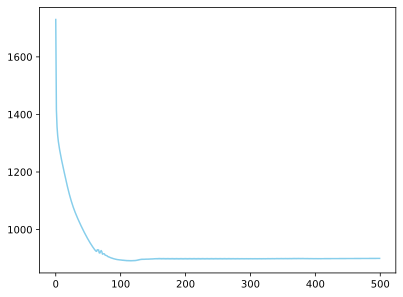

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
# plt.style.use("seaborn")

n_iter = 500
learning_rate = 0.05

history = [backward(model, X, y, learning_rate) for _ in range(n_iter)]

plt.plot(range(len(history)), history, color="skyblue")
plt.show()

In [9]:
learning = one_hot_encode(word_to_id["learning"], len(word_to_id))
result = forward(model, [learning], return_cache=False)[0]

for word in (id_to_word[id] for id in np.argsort(result)[::-1]):
    print(word)

machine
learning
algorithms
is
intelligence
so
the
artificial
are
build
do
study
needed
of
develop
computer
to
subset
it
perform
infeasible
vision
conventional
tasks
used
automatically
a
difficult
where
through
seen
or
variety
experience
improve
wide
that
make
being
mathematical
applications
explicitly
in
decisions
programmed
and
email
predictions
model
without
filtering
based
on
such
as
known
order
training
sample
data


In [10]:
def get_embedding(model, word):
    try:
        idx = word_to_id[word]
    except KeyError:
        print("`word` not in corpus")
    one_hot = one_hot_encode(idx, len(word_to_id))
    return forward(model, one_hot)["a1"]

In [11]:
get_embedding(model, "machine")

array([-0.36140643, -0.53044092, -1.43462377])

In [12]:
get_embedding(model, "learning")

array([-0.34776275, -0.45308723, -1.39594629])

In [14]:
get_embedding(model, "perform")

array([-1.37717378, -2.63860341, -0.43376861])

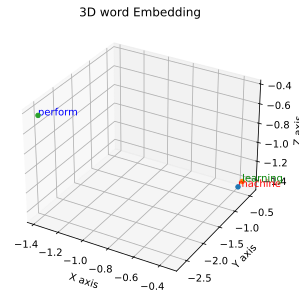

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the 5 numpy arrays of shape (3,1)
array1 = np.array([[-0.36140643, -0.53044092, -1.43462377]])
array2 = np.array([[-0.34776275, -0.45308723, -1.39594629]])
array3 = np.array([[-1.37717378, -2.63860341, -0.43376861]])


# Convert them to the shape (3,) for easier plotting
points = [array1.flatten(), array2.flatten(), array3.flatten()]
# Create a new figure for 3D plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot each point
i = 0
l = ['r', 'g', 'b']
w = ["machine", "learning", "perform"]
for point in points:
    ax.scatter(point[0], point[1], point[2])
    ax.text(point[0], point[1], point[2], w[i] , color=l[i])
    i += 1



# Set labels for the axes
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

ax.set_title('3D word Embedding')

# Show the plot
plt.show()


Observation:
1. Both words "machine" and  "learning" occur together often and positioned close to each other in space. 

### Word embedding can also be generated using gensim word3vec library

In [45]:
from gensim.models import Word2Vec
import gensim
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings
 
warnings.filterwarnings(action='ignore')
 
 
#  Reads ‘alice.txt’ file
sample = open("reti.txt")
s = sample.read()
 
# Replaces escape character with space
f = s.replace("\n", " ")
 
data = []
 
# iterate through each sentence in the file
for i in sent_tokenize(f):
    temp = []
 
    # tokenize the sentence into words
    for j in word_tokenize(i):
        temp.append(j.lower())
 
    data.append(temp)
 
# Create CBOW model
model1 = gensim.models.Word2Vec(data, min_count=1,
                                vector_size=3, window=5)
 
# Print results
print("Cosine similarity between 'sherlock' " +
      "and 'holmes' - CBOW : ",
      model1.wv.similarity('sherlock', 'holmes'))

Cosine similarity between 'sherlock' and 'holmes' - CBOW :  0.86923003
